# 📊 **Data Mining Preliminary Project**

**Group Members**
- Nathanael Chris Abrigo
- Dwight Kenneth Cruz
- Joshua Kyle Kessel Entrata
- Edjin Jerney Payumo

#### **Importing Libraries**

In [2]:
### Importing Libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Setup for the notebook
pd.set_option('display.max_columns', None)
%matplotlib inline


#### Load the preprocessed dataset

In [3]:
# Loading the 2023 FIES Dataset Volume 2
final_fies = pd.read_csv('../../data/processed/final_fies.csv')


In [4]:
final_fies

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_TRANS,NET_NEC_A8,NET_NEC_A9,NET_NEC_A10,EAINC,LOSSES,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,TEA,COCOA,WATER,SOFTDRINKS,OTHER_NON_ALCOHOL,ALCOHOL,TOBACCO,OTHER_VEG,SERVICES_PRIMARY_GOODS,ALCOHOL_PROCDUCTION_SERVICES,FOOD_HOME,FOOD_OUTSIDE,FOOD,CLOTH,HOUSING_WATER,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,EDUCATION,INSURANCE,MISCELLANEOUS,DURABLE,OCCASION,OTHER_EXPENDITURE,OTHER_DISBURSEMENT,FOOD_ACCOM_SRVC,NFOOD,TOINC,TOTEX,TOTDIS,OTHREC,TOREC,RPSU,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR,SOCIAL_CLASS
0,13,39,105930,3900,4.0,352200,0,352200,0,0,0,0,0,0,0,0,0,2276.0,0,0,0,0,0,0,0,0,0,0,0,0,27979.0,30420.0,16640.0,2020.0,4620.0,3340.0,8710.0,1595.0,2490.0,0.0,5475.0,0.0,0.0,2470.0,0.0,0.0,0.0,0.0,0.0,0,0,105759.0,81565.0,187324.0,2370,36660,0,15000,3000,18000,2674,1860,6344,8200,0,0,8166,7122,0,0,0,900,0,73396.0,369476.0,260720.0,261620.0,5000,374476.0,2151,405.804138,1479.726685,1,92369.000000,7,4,5,5,4,13,Low income
1,13,39,105931,3900,5.5,219760,0,219760,0,60000,0,80000,0,0,0,0,0,500.0,0,0,0,0,0,0,0,0,0,0,0,0,39031.0,24925.0,18200.0,8900.0,1565.0,4640.0,10450.0,660.0,1685.0,0.0,3215.0,0.0,0.0,1690.0,0.0,0.0,0.0,9200.0,0.0,0,0,114961.0,114000.0,228961.0,2650,70440,0,37800,0,37800,5510,21595,3720,13660,5080,0,0,14996,0,500,0,0,0,147351.0,398060.0,376312.0,376312.0,40000,438060.0,2151,405.804138,2034.624191,1,72374.546875,6,3,3,3,3,13,Lower-middle income
2,13,39,105932,3900,2.0,0,0,0,0,0,6000,0,0,0,0,0,0,500.0,0,0,0,0,156000,0,0,0,0,0,156000,0,20289.0,17320.0,8450.0,1630.0,1565.0,1430.0,22425.0,2085.0,2490.0,0.0,5475.0,0.0,0.0,2470.0,0.0,0.0,0.0,0.0,0.0,0,0,85629.0,10400.0,96029.0,2730,37380,6000,12000,0,18000,4742,1690,6500,5200,100,150,0,6654,0,1500,0,10000,0,66646.0,174500.0,162675.0,172675.0,8000,182500.0,2151,405.804138,739.863342,1,87250.000000,7,4,4,4,4,13,Poor
3,13,39,105933,3900,7.5,338800,0,338800,0,0,1000,0,0,0,0,0,0,200.0,0,0,0,0,0,0,84000,0,0,0,84000,0,37285.0,37050.0,31200.0,5125.0,1500.0,5230.0,5800.0,1055.0,3420.0,0.0,10956.0,0.0,0.0,1560.0,455.0,0.0,0.0,1840.0,0.0,0,0,140636.0,161600.0,302236.0,960,69760,0,48000,0,48000,3300,300,5668,7800,1820,0,0,14956,0,1100,0,5000,0,107504.0,472000.0,409740.0,414740.0,7500,479500.0,2151,405.804138,2774.487534,1,62933.332031,5,2,2,2,2,13,Lower-middle income
4,13,39,105934,3900,11.0,471720,0,471720,0,0,6600,0,0,0,0,0,0,0.0,0,0,0,0,312000,0,0,0,0,0,312000,0,53135.0,40040.0,50160.0,8610.0,2145.0,3510.0,17290.0,2857.0,2495.0,0.0,10950.0,0.0,0.0,3380.0,0.0,0.0,9360.0,0.0,0.0,0,0,194572.0,238080.0,432652.0,2200,61940,0,30000,0,30000,6118,1800,39000,15600,0,0,5826,17400,0,6000,4500,60900,0,169744.0,820320.0,602396.0,663296.0,55000,875320.0,2151,405.804138,4069.248383,1,74574.546875,6,3,3,3,3,13,Lower-middle income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19487,13,76,126615,7607,5.0,249360,0,249360,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,166500,0,0,0,166500,0,28555.0,21406.0,12900.0,16920.0,2820.0,1870.0,3640.0,1675.0,2830.0,0.0,3042.0,0.0,0.0,2600.0,870.0,0.0,5100.0,2600.0,0.0,0,0,99128.0,30700.0,129828.0,2410,105940,0,72000,0,72000,10174,5250,14300,12374,75,0,10800,16155,0,0,2000,3800,0,187178.0,487860.0,317006.0,320806.0,0,487860.0,780,216.904846,977.090073,1,97572.000000,7,5,4,5,5,13,Low income
19488,13,76,126616,7607,1.0,215720,0,215720,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,12363.0,6280.0,4070.0,1050.0,336.0,725.0,840.0,150.0

In [5]:
# Define the correct order for SOCIAL_CLASS
final_fies['SOCIAL_CLASS'] = pd.Categorical(
    final_fies['SOCIAL_CLASS'], 
    categories=['Poor', 'Low income', 'Lower-middle income', 'Middle income'], 
    ordered=True
)

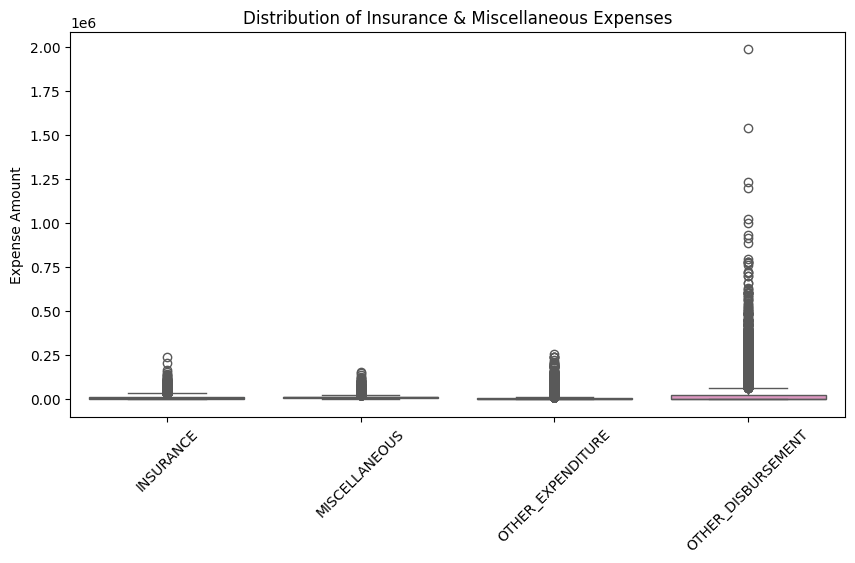

           INSURANCE  MISCELLANEOUS  OTHER_EXPENDITURE  OTHER_DISBURSEMENT
count   19492.000000   19492.000000       19492.000000        1.949200e+04
mean     9296.994254   11424.482506        6800.017443        2.718949e+04
std     12995.348555    8202.025999       16975.458690        6.718998e+04
min         0.000000     558.000000           0.000000        0.000000e+00
25%         0.000000    6443.000000           0.000000        0.000000e+00
50%      5400.000000    9612.000000         400.000000        0.000000e+00
75%     13200.000000   14048.250000        5000.000000        2.600000e+04
max    239630.000000  156164.000000      253584.000000        1.985402e+06


In [6]:
# Columns for analysis
columns = ['INSURANCE', 'MISCELLANEOUS', 'OTHER_EXPENDITURE', 'OTHER_DISBURSEMENT']

# Boxplot to check for outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=final_fies[columns], palette="Set2")
plt.title("Distribution of Insurance & Miscellaneous Expenses")
plt.ylabel("Expense Amount")
plt.xticks(rotation=45)
plt.show()

# Summary statistics
print(final_fies[columns].describe())

-Presence of Outliers: Circles above each box indicate outliers, especially in OTHER_DISBURSEMENT, exceeding 2,000,000 PHP.

-Expense Concentration: Most expenses are low, with the median close to the bottom of each box.
Interquartile Range (IQR): The small boxes indicate most values fall within a narrow range.

-OTHER_DISBURSEMENT Variability: This category has the widest spread and extreme outliers.

-Comparison Across Categories: INSURANCE, MISCELLANEOUS, and OTHER_EXPENDITURE have similar distributions, while OTHER_DISBURSEMENT has significantly higher values.

-Potential Influences: Large outliers in OTHER_DISBURSEMENT may be due to one-time large expenses, business disbursements, or data errors.

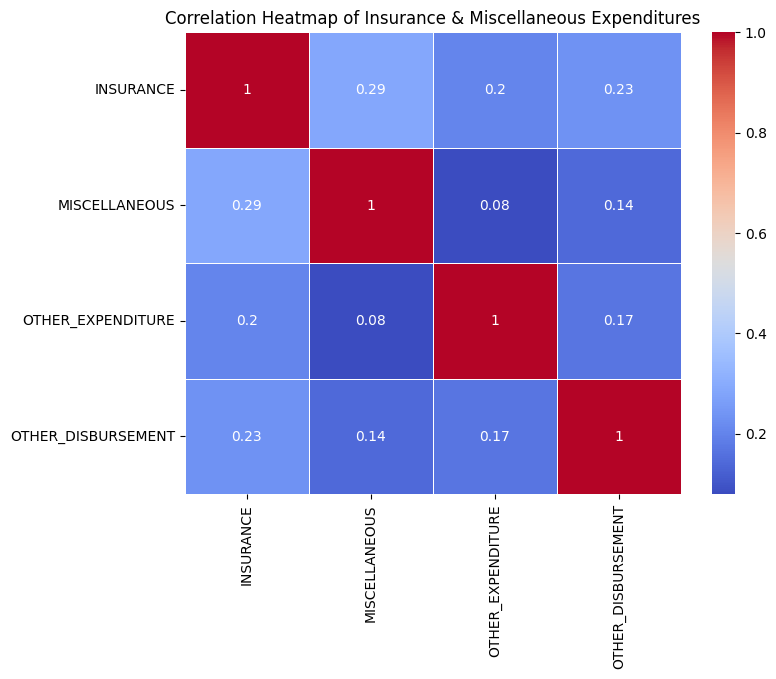

In [7]:
# Compute correlation
correlation_matrix = final_fies[columns].corr()

# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Insurance & Miscellaneous Expenditures")
plt.show()


C:\Users\Judiciel Cruz\AppData\Local\Temp\ipykernel_20368\1957488893.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spending = final_fies.groupby("SOCIAL_CLASS")[columns].mean().reset_index()


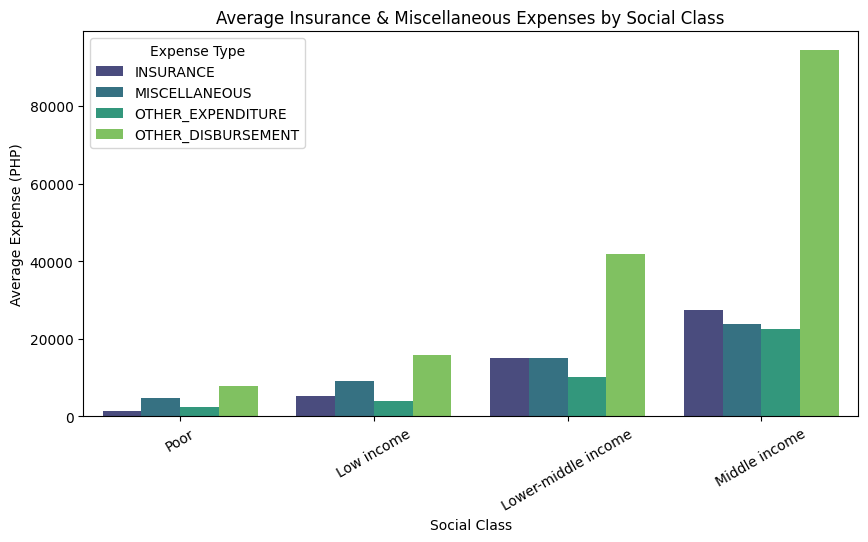

In [8]:
# Group by Social Class and compute the mean
avg_spending = final_fies.groupby("SOCIAL_CLASS")[columns].mean().reset_index()

# Melt dataframe for easier plotting
avg_spending_melted = avg_spending.melt(id_vars=["SOCIAL_CLASS"], var_name="Expense Type", value_name="Average Expense")

# Barplot
plt.figure(figsize=(10, 5))
sns.barplot(x="SOCIAL_CLASS", y="Average Expense", hue="Expense Type", data=avg_spending_melted, palette="viridis")
plt.title("Average Insurance & Miscellaneous Expenses by Social Class")
plt.xlabel("Social Class")
plt.ylabel("Average Expense (PHP)")
plt.xticks(rotation=30)
plt.legend(title="Expense Type")
plt.show()


-Expense Distribution: Middle-income groups have the highest insurance & miscellaneous expenses.
-Income Effect: Higher social classes spend significantly more on OTHER_DISBURSEMENT.

-Poor & Low Income: Lower expenses across all categories, except OTHER_DISBURSEMENT, which is still noticeable.

-Spending Growth: OTHER_DISBURSEMENT increases exponentially as social class rises.

-Comparison: INSURANCE, MISCELLANEOUS, and OTHER_EXPENDITURE increase steadily but at a lower rate.